In [2]:
import h5py

import numpy   as np
import pandas  as pd
import seaborn as sns

import matplotlib.pyplot as plt
# plt.style.use('../histograms.mplstyle')

import scipy.stats
import scipy.optimize

from matplotlib.ticker import ScalarFormatter

In [3]:
FILE_NAME = "LCP_modA_finalProject\data\RUN001231_channels.h5"

# get keys
f = h5py.File(FILE_NAME, "r")
keys = f.keys()

# build the dataset by concatenating all channels together
df = pd.concat(
    [
        pd.read_hdf(FILE_NAME, key=k, mode="r") for k in keys
    ],
    ignore_index=True
)

# rename columns
df = df.rename(columns={"CH":"ch", "HIT_DRIFT_TIME":"drift_time", "THETA":"theta"})

print(f"Shape: {df.shape}")
print(f'Features: {list(df.columns)}')
df.head()

Shape: (236533, 4)
Features: ['ch', 'drift_time', 'm', 'theta']


,ch,drift_time,m,theta
0,100,202.166667,0.739694,36.490121
1,100,165.500000,0.022485,1.288090
2,100,198.000000,0.022919,1.312941
3,100,207.166667,0.160641,9.126084
4,100,213.833333,-0.095128,-5.434092


In [4]:
data = pd.concat([df.theta,df.drift_time], axis=1)
data


,theta,drift_time
0,36.490121,202.166667
1,1.288090,165.500000
2,1.312941,198.000000
3,9.126084,207.166667
4,-5.434092,213.833333
...,...,...
236528,-3.777508,348.000000
236529,10.274015,296.333333
236530,2.284967,293.000000
236531,0.454853,22.166667


Visualization: istogramma totale

max and min of theta: 89.35798286121603 -89.57006386753162
max and min of drift_time: 593.8333333333321 -198.66666666666424


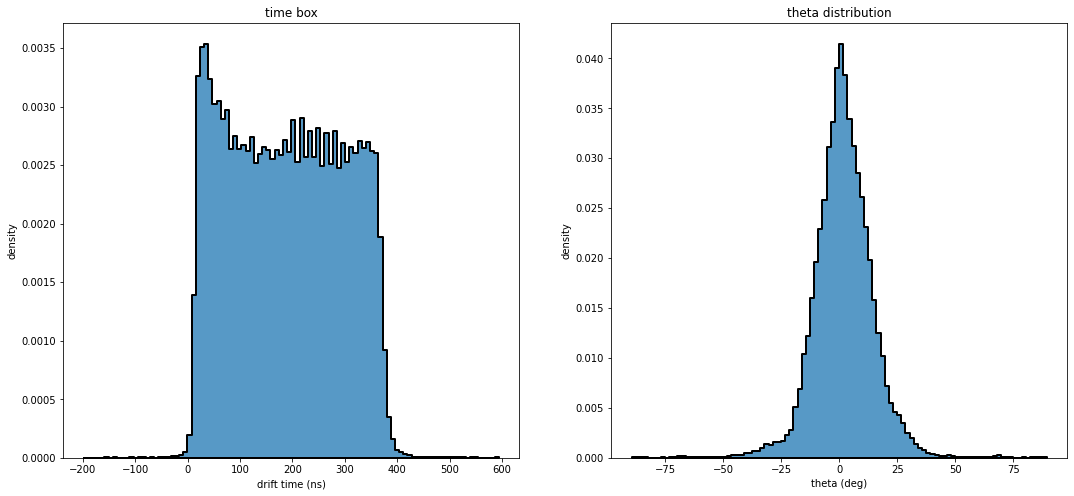

[3.69917705e-02 1.54728446e+00 1.01898255e+01 3.08237484e-04]
[[ 1.10467413e-07 -4.45087868e-13 -1.65504795e-05 -7.19243243e-09]
 [-4.45087868e-13  1.06616626e-02  1.45936174e-10 -1.03331145e-13]
 [-1.65504795e-05  1.45936174e-10  1.22052888e-02 -3.96247572e-06]
 [-7.19243243e-09 -1.03331145e-13 -3.96247572e-06  1.01716376e-08]]
the mean of theta distribution: 0.03699177045075421


"Quale è l'errore su theta mean?"

In [5]:
n=len(data)
for i in data.keys():
    print(f'max and min of {i}:',data[i].max(), data[i].min())
# plt.figure(figsize=[15,10]); plt.title('Histogram of entire dataframe', fontsize=16)
# plt.xlabel('Drift time (ns)', fontsize=14); plt.ylabel('Frequency', fontsize=14)
# plt.hist(data["drift_time"], bins=int(np.sqrt(n)))
# plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].set_title("time box"); ax[0].set_xlabel("drift time (ns)"); ax[0].set_ylabel("density")
ax[1].set_title("theta distribution"); ax[1].set_xlabel("theta (deg)"); ax[1].set_ylabel("density")

sns.histplot(x = data.drift_time,
            stat='density', #normalized 
            bins=100,  #in defaul da il numero di bins
            element = "step",
            fill = True,
            color = "tab:blue",
            edgecolor = "black",
            linewidth = 2,
            label = "full dataset",
            ax = ax[0]
            )
sns.histplot(x = data.theta,
            stat='density', #normalized 
            bins=100,  #in defaul da il numero di bins
            element = "step",
            fill = True,
            color = "tab:blue",
            edgecolor = "black",
            linewidth = 2,
            label = "full dataset",
            ax = ax[1]
            )
plt.show()
from scipy.optimize import curve_fit
def gaussian(x, A, mu, sigma, offset):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * sigma**2)) + offset

y, bin_edge = np.histogram(data.theta, bins=100,density=True)
bin_centers = (bin_edge[1:] + bin_edge[:-1])/2
popt_gauss, pcov_gauss = curve_fit(gaussian, bin_centers ,y , p0=[1,2,3,4],full_output=False)
ax[1].plot(np.linspace(-90,90,1000), gaussian(np.linspace(-90,90,1000) , *popt_gauss))

print(popt_gauss); print(pcov_gauss)
print(f'the mean of theta distribution: {popt_gauss[0]}')
'''Quale è l'errore su theta mean?'''

## Coefficiente lineare

Relazione che si va a cercare: $\theta$ grande implica che il muone con maggiore probabilità sia passato per i centri e quindi corrisponde un tempo di deriva piccolo. Viceversa per $\theta $ piccolo il tempo sarà diverso per ogni cella e dunque tempoi medi saranno rispettivamente maggiori.

$\theta$ grande $\rightarrow$ tempi piccolo \
$\theta$ piccolo $\rightarrow$ tempi grandi




In [6]:
# correlation coefficient and its p-value
# note that I'm considering the absolute value of the angular feature:
# due to its simmetry I believe that we can get more statistical significance if we do so
r, p = scipy.stats.pearsonr(df.drift_time, np.abs(df.theta))
# set a confidence level at 5%
alpha = 0.05

print(f"Correlation coefficient between drift time and theta: {r:.5f}")
print(f"p-value = {p:.3e}")
print("Statistically significant:", "YES" if p < alpha else "NO")

Correlation coefficient between drift time and theta: -0.02834
p-value = 3.208e-43
Statistically significant: YES


first of all, let's cut the data to see if it could be the relation between drift time and theta. to this purpose, the first cut is made by taking only the time corresponding to small theta ($\theta < 5°$) and big theta ($\theta > 40°$). What we expect is that the histogram of the big angles will have a peack near the small time, since the bigger probability of having small time (near the drift tube). while for the small angles we expect the box distribution since the probability of having small or big time is the same (alternately near or far from the tume)





Stats:
* frequency = number of observations divided by the bin width
* probability = normalizza tale che la somma delle barre di altezza è uguale a 1
* percent = somma delle altezze è 100
* density = area totale dell'hist è 1


<function matplotlib.pyplot.show(close=None, block=None)>

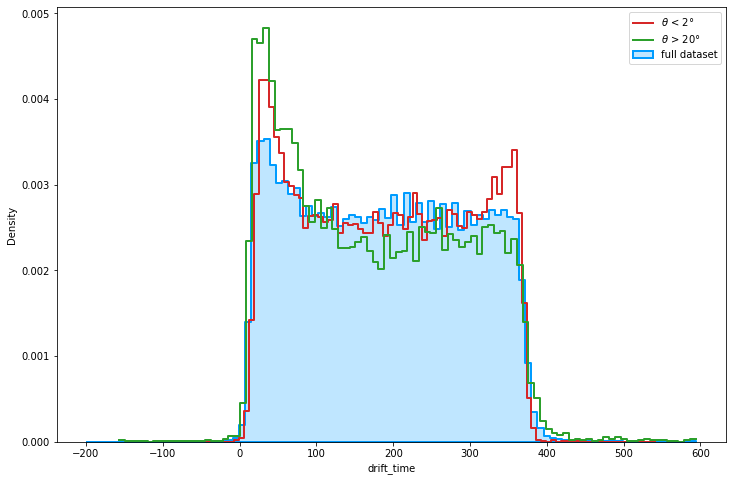

In [7]:
#absolute value of theta
# data.theta = np.abs(data.theta)

#cutting
small_theta = data[ np.abs(data['theta']) < 2]
big_theta = data[ np.abs(data['theta']) > 20]

fig, ax = plt.subplots(figsize=[12,8])
sns.histplot(x = data.drift_time,
            stat='density', 
            bins=100,  #in defaul da il numero di bins
            element = "step",
            fill = True,
            color = "#aadeff",
            edgecolor = "#009cff",
            linewidth = 2,
            label = "full dataset",
            ax = ax
            )

sns.histplot(x = small_theta.drift_time,
            stat='density', 
            bins=100,  #in defaul da il numero di bins
            element = "step",
            fill = False,
            color = "tab:red",
            linewidth = 2,
            label = r"$\theta$ < 2°",
            ax = ax
            )

sns.histplot(x = big_theta.drift_time,
            stat='density', 
            bins=100,  #in defaul da il numero di bins
            element = "step",
            fill = False,
            color = "tab:green",
            linewidth = 2,
            label = r"$\theta$ > 20°",
            ax = ax
            )
plt.legend()
plt.show



Let's calculate the probability that una hit si localizzi nel picco.
l'intervallo del picco è $0 < t < 97$ ns. 97ns corrisponde al tempo impiegato per percorrere 1/4 della distanza bordo-filo dentro una cella. Abbiamo scelto questo intervallo semplicemente guardando l'istogramma sopra: \
Total

In [8]:
y, bin_edge = np.histogram(data.drift_time , bins=100, density=True)

bin_width = bin_edge[1]-bin_edge[0]
bin_centers = (bin_edge[1:] + bin_edge[:-1])/2

dic = {'bin':bin_centers, 'y':y}
d = pd.DataFrame(dic)
sum = d[  (d['bin'] > 0) & (d['bin'] <97)  ]['y'].sum()
sum*bin_width

0.25708040738501575

In [9]:
max(y)/2

0.0017687156610329488

Small angle

In [10]:
y, bin_edge = np.histogram(small_theta.drift_time , bins=100, density=True)

bin_width = bin_edge[1]-bin_edge[0]
bin_centers = (bin_edge[1:] + bin_edge[:-1])/2

dic = {'bin':bin_centers, 'y':y}
d = pd.DataFrame(dic)
sum = d[  (d['bin'] > 0) & (d['bin'] <97)  ]['y'].sum()
sum*bin_width


0.26383202099737535

big Angle


In [11]:
y, bin_edge = np.histogram(big_theta.drift_time , bins=100, density=True)

bin_width = bin_edge[1]-bin_edge[0]
bin_centers = (bin_edge[1:] + bin_edge[:-1])/2

dic = {'bin':bin_centers, 'y':y}
d = pd.DataFrame(dic)
sum = d[  (d['bin'] > 0) & (d['bin'] <97)  ]['y'].sum()
sum*bin_width


0.3311419308357344

In [12]:
print(len(small_theta))
print(len(big_theta))
print(len(data))

38100
22208
236533


In [63]:
thetas = [5, 10, 15, 20, 25, 30, 35, 40]
bins = np.linspace(-90,600,100)
bin_width = bins[1]-bins[0]
bin_centers = (bins[1:]+bins[-1:])/2

low_cuts = [ np.abs(data.theta) < i for i in thetas ]
upper_cuts = [ np.abs(data.theta) > i for i in thetas ]
# middle_cuts=[]
hist_low = [np.histogram( data[cut].drift_time , bins=bins)[0] for cut in low_cuts] #np.hist return 2 argomenti: le frequenze e i bin edge
# bin_edge = [np.histogram( data[cut].drift_time , bins=bins, density=True)[1] for cut in low_cuts] #np.hist return 2 argomenti: le frequenze e i bin edge
hist_up = [np.histogram( data[cut].drift_time , bins=bins)[0] for cut in upper_cuts] #np.hist return 2 argomenti: le frequenze e i bin edge

low_probability=[]
low_err=[]
for cut in low_cuts:
    y, bin_edge = np.histogram(data[cut].drift_time , bins=100, density=True)
    bin_width = bin_edge[1]-bin_edge[0]
    bin_centers = (bin_edge[1:] + bin_edge[:-1])/2

    dic = {'bin':bin_centers, 'y':y}
    d = pd.DataFrame(dic)
    sum = d[ (d['bin'] > 0) & (d['bin'] <97) ]['y'].sum()
    prob=sum*bin_width
    low_probability.append(prob)
    # low_err.append()
    print(prob)
print('\n')

up_probability=[]
up_err=[]
for cut in upper_cuts:
    y, bin_edge = np.histogram(data[cut].drift_time , bins=100, density=True)
    bin_width = bin_edge[1]-bin_edge[0]
    bin_centers = (bin_edge[1:] + bin_edge[:-1])/2

    dic = {'bin':bin_centers, 'y':y}
    d = pd.DataFrame(dic)
    sum = d[  (d['bin'] > 0) & (d['bin'] <97)  ]['y'].sum()
    prob=sum*bin_width
    up_probability.append(prob)
    # up_err.append()
    print(prob)    

0.2598455065866611
0.24033049694577047
0.2460508590064338
0.24890236789921816
0.251312744251008
0.2540775564316364
0.25631935152159196
0.2566435629593836


0.26458649583051874
0.294004181249061
0.3100776944620105
0.3311419308357344
0.3402555910543127
0.315949647254115
0.307149805447471
0.30827067669172936


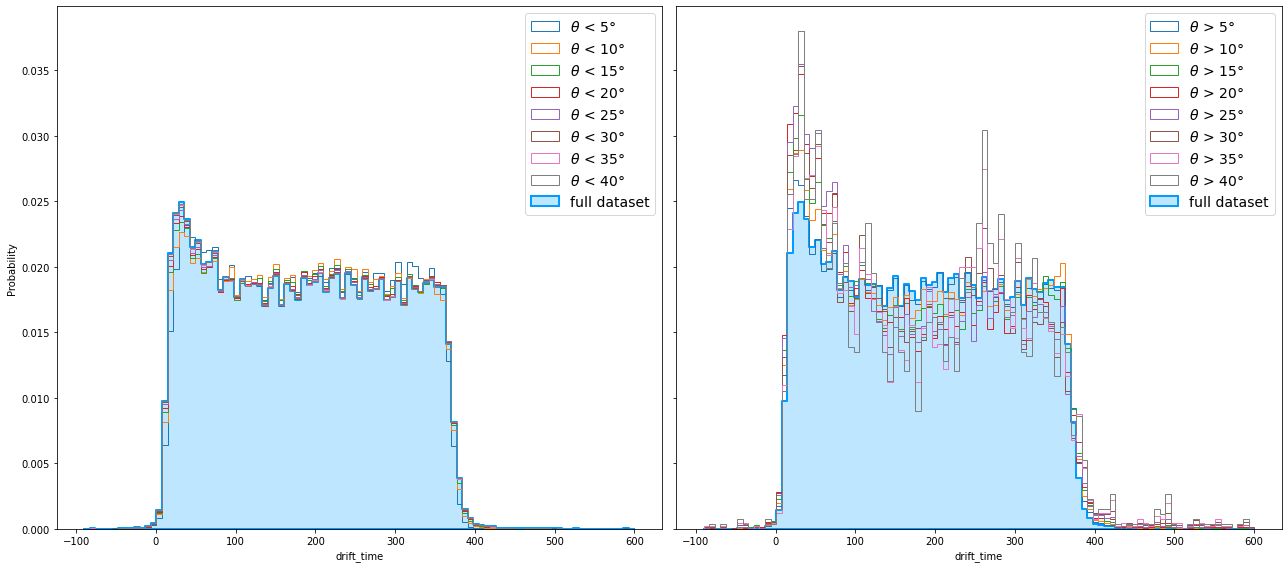

In [64]:
low_hists = [ h/ np.sum(h) for h in hist_low]
high_hists = [h/ np.sum(h) for h in hist_up]

fig, ax = plt.subplots(nrows=1,ncols=2,sharex=True, sharey=True, figsize=(18,8))
sns.histplot(x = data.drift_time,
            stat='probability', 
            bins=bins,  #in defaul da il numero di bins
            element = "step",
            fill = True,
            color = "#aadeff",
            edgecolor = "#009cff",
            linewidth = 2,
            label = "full dataset",
            ax = ax[0]
            )
sns.histplot(x = data.drift_time,
            stat='probability', 
            bins=bins,  #in defaul da il numero di bins
            element = "step",
            fill = True,
            color = "#aadeff",
            edgecolor = "#009cff",
            linewidth = 2,
            label = "full dataset",
            ax = ax[1]
            )

# low-cut time boxes
for h, theta in zip(low_hists, thetas):
    ax[0].hist(
        bins[:-1],
        bins=bins,
        weights=h,
        histtype="step",
        label=r"$\theta$ < "+str(theta)+"°"
    )

# high-cut time boxes
for h, theta in zip(high_hists, thetas):
    ax[1].hist(
        bins[:-1],
        bins=bins,
        weights=h,
        histtype="step",
        label=r"$\theta$ > "+str(theta)+"°"
    )


ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)

fig.tight_layout()
plt.show()


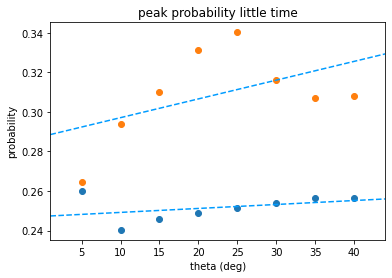

In [65]:
from scipy.optimize import curve_fit

def lin(x, a, b): return a + b*x

theta_grid = np.linspace(thetas[0]-4, thetas[-1]+4, 500)

low,_ = curve_fit(
    f=lin,
    xdata=thetas,
    ydata=low_probability
)

up,_ = curve_fit(
    f=lin,
    xdata=thetas,
    ydata=up_probability
)

fig, ax = plt.subplots()

ax.set_title("peak probability little time")
ax.set_xlabel("theta (deg)")
ax.set_ylabel("probability")

ax.set_xlim(theta_grid[0], theta_grid[-1])

ax.scatter(thetas,low_probability)
# low-cut fit
ax.plot(
    theta_grid, 
    lin(theta_grid, *low),
    linestyle = "dashed",
    color = "#009cff", 
)
# low-cut fit
ax.plot(
    theta_grid, 
    lin(theta_grid, *up),
    linestyle = "dashed",
    color = "#009cff", 
)
ax.scatter(thetas,up_probability)

## Intervalli

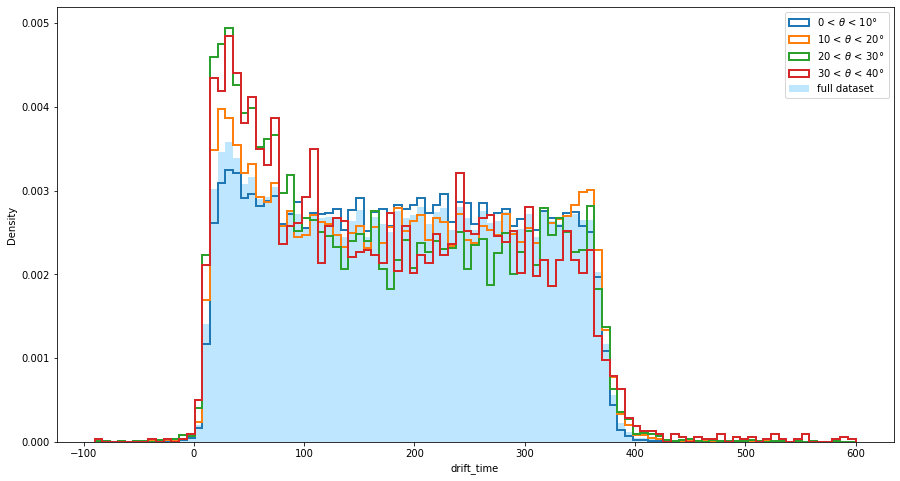

In [16]:
thetas_low = [0,10,20,30]
thetas_up = [10,20,30,40]
# thetas_low = [0,5,10,15,20,25,30,35]
# thetas_up = [5,10,15,20,25,30,35,40]
bins = np.linspace(-90,600,100)

middle_hist = [np.histogram(
    data[ (np.abs(data["theta"]) > low ) & (np.abs(data["theta"]) < up )].drift_time,
    bins=bins,
    density=True
    )[0] 
    for low,up in zip(thetas_low,thetas_up) ]

fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(
    x         = df.drift_time,
    bins      = bins,
    stat      = "density",
    element   = "step",
    fill      = True,
    color     = "#aadeff",
    edgecolor = "none",
    label     = "full dataset",
    linewidth = 3,
    ax        = ax
)

# low-cut time boxes
for h, theta_low, theta_up in zip(middle_hist, thetas_low,thetas_up,):
    ax.hist(
        bins[:-1],
        bins=bins,
        weights=h,
        histtype="step",
        linewidth = 2,
        label=str(theta_low)+" "+ r"< $\theta$ < "+str(theta_up)+"°"
    )
ax.legend()


### Intervalli più piccoli

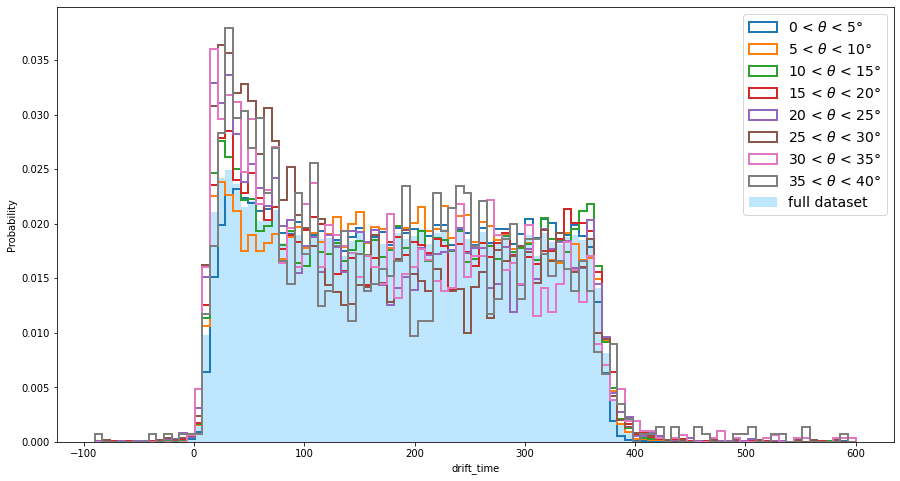

In [17]:
def normalize(hist): return (hist / np.sum(hist))

# thetas_low = [0,10,20,30]
# thetas_up = [10,20,30,40]
thetas_low = [0,5,10,15,20,25,30,35]
thetas_up = [5,10,15,20,25,30,35,40]
bins = np.linspace(-90,600,100)

middle_hist = [np.histogram(
    data[ ( np.abs(data["theta"]) > low ) & ( np.abs(data["theta"]) < up )].drift_time,
    bins=bins,
    )[0] 
    for low,up in zip(thetas_low,thetas_up) ]

middle_norm_hist = [normalize(h) for h in middle_hist]
middle_norm = [np.sum(h) for h in middle_hist]
middle_err = [np.sqrt(h/ n) for h,n in zip(middle_norm_hist, middle_norm)]
middle_peaks     = [h.max() for h in middle_norm_hist]
middle_peaks_err = [e.max() for e in middle_err]

fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(
    x         = df.drift_time,
    bins      = bins,
    stat      = "probability",
    element   = "step",
    fill      = True,
    color     = "#aadeff",
    edgecolor = "none",
    label     = "full dataset",
    ax        = ax
)

# low-cut time boxes
for h, theta_low, theta_up in zip(middle_norm_hist, thetas_low,thetas_up,):
    ax.hist(
        bins[:-1],
        bins=bins,
        weights=h,
        histtype="step",
        linewidth = 2,
        label=str(theta_low)+" "+ r"< $\theta$ < "+str(theta_up)+"°"
    )
ax.legend(fontsize=14)


### correlazione lineare con intervalli

<ErrorbarContainer object of 3 artists>

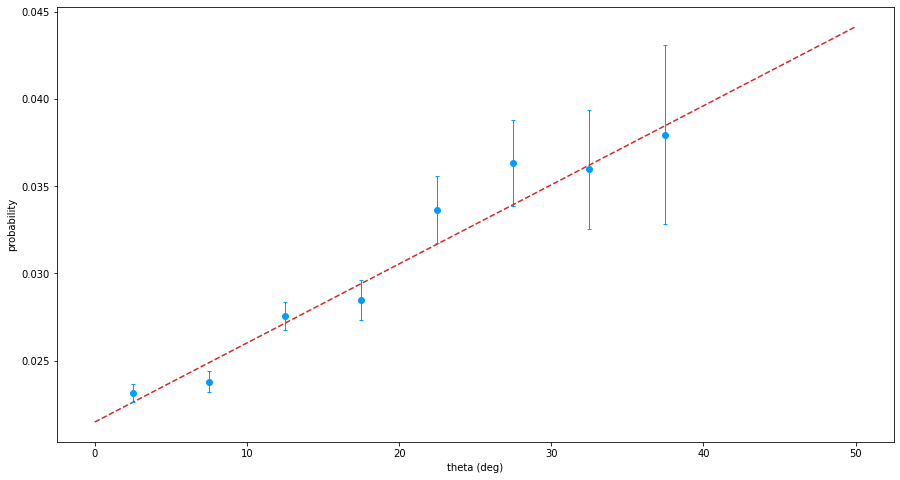

In [18]:
from scipy.optimize import curve_fit

def lin(x, A, B): return A + B*x

xdata = [(up + down)/2 for up,down in zip(thetas_up,thetas_low)]
middle_par, _ = curve_fit(f=lin,
    xdata=xdata,
    ydata=middle_peaks,
    sigma=middle_peaks_err,
    )

fig, ax = plt.subplots(figsize=(15,8))

ax.set_xlabel("theta (deg)"); ax.set_ylabel("probability")

x_theta = np.linspace(0,50,500)

ax.plot(x_theta, lin(x_theta, *middle_par), linestyle='dashed', color='tab:red')
# ax.scatter(xdata, middle_peaks)
ax.errorbar(x=xdata, 
    y=middle_peaks, 
    yerr=middle_peaks_err,
    marker     = "o",
    color      = "#009cff",
    linestyle  = "none",
    elinewidth = 1, 
    capsize    = 2
    )



In [19]:
# -------- CORRELATION COEFFICIENTS
# set a confidence level at 5%
alpha = 0.05

# compute correlation coefficients
middle_r,   middle_p = scipy.stats.pearsonr(xdata, middle_peaks)

print("\nmiddle CUT:")
print(f"Correlation coefficient {middle_r:.5f}")
print(f"p-value = {middle_p:.2e}")
print("Statistically significant:", "YES" if middle_p < alpha else "NO")



middle CUT:
Correlation coefficient 0.97561
p-value = 3.56e-05
Statistically significant: YES


## Try to estimate the maximum of the peak probability

### Primo tentativo di prova / cella di sperimentazione

In [111]:
x=np.linspace(0,100, 35)

df_prova = data[ np.abs(data["theta"]) > 10 ]
# df_prova = data[ ( np.abs(data["theta"]) < 40 ) ]
# p, b = np.histogram(df_prova[  (df_prova['drift_time'] > 0) & (df_prova['drift_time'] <97)  ].drift_time, bins=x, density=True)
p, b = np.histogram(df_prova[  (df_prova['drift_time'] > 0) & (df_prova['drift_time'] <97)  ].drift_time, bins=x)
p_norm = normalize(p)

bin_centers = (b[1:]+b[:-1])/2
DF = pd.DataFrame({'prob':p_norm, 'bin_cent':bin_centers})

prob_peak = DF['prob'].max()
bin_peak = DF['bin_cent'][DF[DF['prob'] == prob_peak].index.tolist()].tolist()[0]

first_half_df = DF.loc[DF['bin_cent'] < bin_peak]
prob_first_half = np.flip(first_half_df.prob)
bin_cent = bin_centers[ (len(first_half_df)+1) : (2*len(first_half_df) +1) ]

second_half_df = pd.DataFrame({'prob':prob_first_half, 'bin_cent':bin_cent})
first_half_df = first_half_df.append({'prob':prob_peak, 'bin_cent':bin_peak}, ignore_index=True)
final_df = first_half_df.append(second_half_df, ignore_index=True)

fig, ax = plt.subplots(nrows=2, figsize=(15,15))

ax[0].hist(
    b[:-1],
    bins=x,
    weights=p_norm,
    edgecolor='black',
    # density=True
)
ax[1].hist(
    final_df.bin_cent,
    bins=x[:len(final_df)+1],
    weights=final_df.prob,
    edgecolor='black'
)
ax[0].set_xlim(x[0],x[-1])
ax[1].set_xlim(x[0],x[-1])

ax[1].scatter(
    final_df['bin_cent'],
    final_df['prob'],
    color='black'
)

from scipy.optimize import curve_fit

def lorentzian(x, A, x0, gamma):
    return A*gamma**2/(gamma**2+(x-x0)**2)

def gaussian(x, A , mean , std ):
    return A * np.exp( - ((x - mean) **2 /(2*std**2)))

popt_gauss, _ = curve_fit(gaussian, final_df['bin_cent'], final_df['prob'], p0=[0.5,20,5])
popt_lor, _ = curve_fit(lorentzian, final_df['bin_cent'], final_df['prob'], p0=[0.5,20,5])

xx=np.linspace(x[0], x[-1], 1000)
ax[1].plot(x, lorentzian(x,*popt_lor), color='red')
ax[0].plot(xx, gaussian(xx,*popt_gauss), color='red', linewidth=3, label='gaussian')
ax[1].plot(xx, gaussian(xx,*popt_gauss), color='red', linewidth=3,label='gaussian')

ax[0].plot(xx, lorentzian(xx,*popt_lor), color='black', linewidth=3, label='lorentzian')
ax[1].plot(xx, lorentzian(xx,*popt_lor), color='black', linewidth=3, label='lorentzian')

def voigt(x, amplG, mu, std, amplL, gamma, p):
    return p*gaussian(x, amplG, mu, std) + (1-p)*lorentzian(x, amplL, mu, gamma)

popt_voigt, _ = curve_fit(voigt, final_df['bin_cent'], final_df['prob'], p0=[0.5 , 20, 1 , 0 , 1 , 0.5])
ax[1].plot(xx, voigt(xx,*popt_voigt), color='orange', linewidth=3, label='voigt')

ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)

yg=gaussian(xx,*popt_gauss)
yl = lorentzian(xx, *popt_lor)
print(yg.max())
print(yl.max())
print(*popt_gauss)
print(*popt_voigt)
final_df

,prob,bin_cent
0,0.001601,1.470588
1,0.002402,4.411765
2,0.006645,7.352941
3,0.014091,10.294118
4,0.027741,13.235294
5,0.029422,16.176471
6,0.046716,19.117647
7,0.037348,22.058824
8,0.049638,25.000000
9,0.037348,27.941176


In [21]:
# plt.scatter(first_half_df['bin_cent'], first_half_df['prob'])
# plt.xlim(0,50)
# print(first_half_df.max())
# p_gauss, _ = curve_fit(
#     gaussian, 
#     first_half_df['bin_cent'], first_half_df['prob'], 
#     p0=[19, 5, 1], 
#     # bounds=( (-70, -np.inf, -np.inf) , (40, np.inf, np.inf) )
#     )

# plt.plot(xx,gaussian(xx, *p_gauss))

## Stimare il picco: 
### taglio basso $\theta < \theta _i$

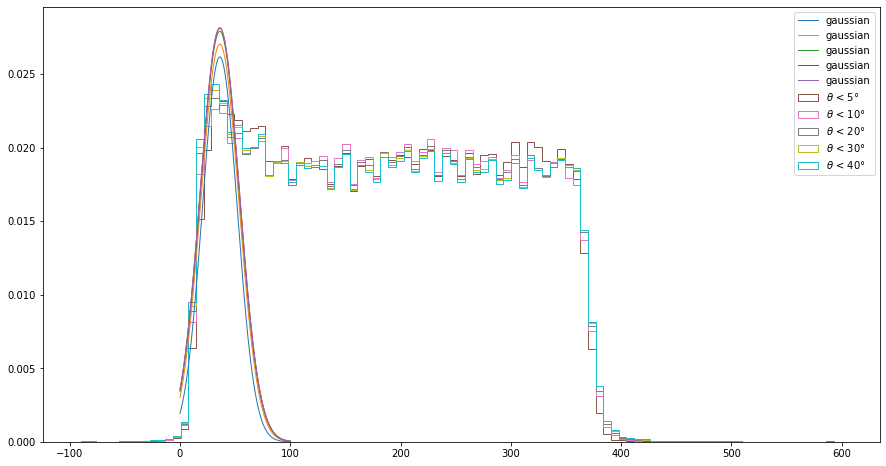

In [41]:
# thetas = [15, 20, 25, 30, 35, 40]
thetas = [5, 10, 20, 30, 40]
bins = np.linspace(-90,600,100)

low_cuts = [
    np.abs(data.theta) < theta for theta in thetas
]

x=np.linspace(0,100, 55)
fig, ax = plt.subplots(figsize=(15,8))

gauss_low_peaks = []
lor_low_peaks = []
low_params=[]
voigt_low_peaks=[]

for cut in low_cuts:
    df_init = data[cut]
    p, b = np.histogram(df_init[  (df_init['drift_time'] > 0) & (df_init['drift_time'] <97)  ].drift_time, bins=x)
    p_norm = normalize(p)
    bin_centers = (b[1:]+b[:-1])/2
    DF = pd.DataFrame({'prob':p_norm, 'bin_cent':bin_centers})
    
    prob_peak = DF['prob'].max()
    bin_peak = DF['bin_cent'][DF[DF['prob'] == prob_peak].index.tolist()].tolist()[0]

    first_half_df = DF.loc[DF['bin_cent'] < bin_peak]
    prob_first_half =  first_half_df['prob']
    bin_cent = pd.Series(bin_centers[ (len(first_half_df)+1) : (2*len(first_half_df) +1) ] , name='bin_cent')

    second_half_df = pd.concat([prob_first_half, bin_cent], axis=1, ignore_index=True)
    second_half_df.columns = ['prob', 'bin_cent']
    second_half_df['prob'] = second_half_df['prob'].values[::-1]

    first_half_df = first_half_df.append({'prob':prob_peak, 'bin_cent':bin_peak}, ignore_index=True)
    final_df = first_half_df.append(second_half_df, ignore_index=True)

    popt_gauss, _ = curve_fit(gaussian, final_df['bin_cent'], final_df['prob'], p0=[0.025,25,9])
    popt_lor, _ = curve_fit(lorentzian, final_df['bin_cent'], final_df['prob'], p0=[0.05,25,5])
    
    y_gauss = gaussian(xx,*popt_gauss)
    gauss_low_peaks.append( y_gauss.max() )

    y_lor = lorentzian(xx,*popt_lor)
    lor_low_peaks.append( y_lor.max() )

    # popt_voigt, _ = curve_fit(voigt, final_df['bin_cent'], final_df['prob'], p0=[0.05 , 20, 1e-5 , 0.02 , 10 , 0.5])
    # ax.plot(xx, voigt(xx,*popt_voigt), color='orange', label='voigt')

    # y_voigt = voigt(xx,*popt_voigt)
    # voigt_low_peaks.append(y_voigt.max())

    ax.plot(xx, gaussian(xx,*popt_gauss), linewidth=1, label='gaussian')
    # ax.plot(xx, lorentzian(xx,*popt_lor), linewidth=1, label='lorentzian')
    low_params.append([*popt_gauss])

for h, theta in zip(low_hists, thetas):
    ax.hist(
        bins[:-1],
        bins=bins,
        weights=h,
        histtype="step",
        label=r"$\theta$ < "+str(theta)+"°"
    )
ax.legend()

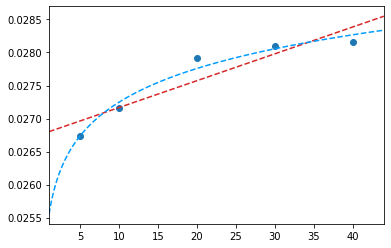

In [43]:
lor_par, _ = curve_fit(
    f=lin,
    xdata=thetas, 
    ydata=lor_low_peaks,
    absolute_sigma=True
)

fig, ax = plt.subplots()

theta_grid = np.linspace(thetas[0]-4, thetas[-1]+4, 500)
ax.set_xlim(theta_grid[0], theta_grid[-1])

ax.scatter(
    thetas, lor_low_peaks
)
ax.plot(
    theta_grid, 
    lin(theta_grid, *lor_par),
    linestyle = "dashed",
    color = "tab:red", 
)

def log(x, A , B): return A * np.log(B*x) 
log_par, _ = curve_fit(
    f=log,
    xdata=thetas, 
    ydata=lor_low_peaks,
    absolute_sigma=True
)
ax.plot(
    theta_grid, 
    log(theta_grid, *log_par),
    linestyle = "dashed",
    color = "#009cff", 
)

In [24]:
low_r, low_p = scipy.stats.pearsonr(thetas, lor_low_peaks)
# high_r, high_p = scipy.stats.pearsonr(thetas, gauss_up_peaks)

print(f"Correlation coefficient {low_r:.5f}")
print(f"p-value = {low_p:.2e}")
print("Statistically significant:", "YES" if low_p < alpha else "NO")

Correlation coefficient 0.92210
p-value = 2.58e-02
Statistically significant: YES


### taglio sopra $\theta > \theta_i$
ho sccelto dei valori di theta ristretti perché con tali valori mi viene un coefficiente r molto buono

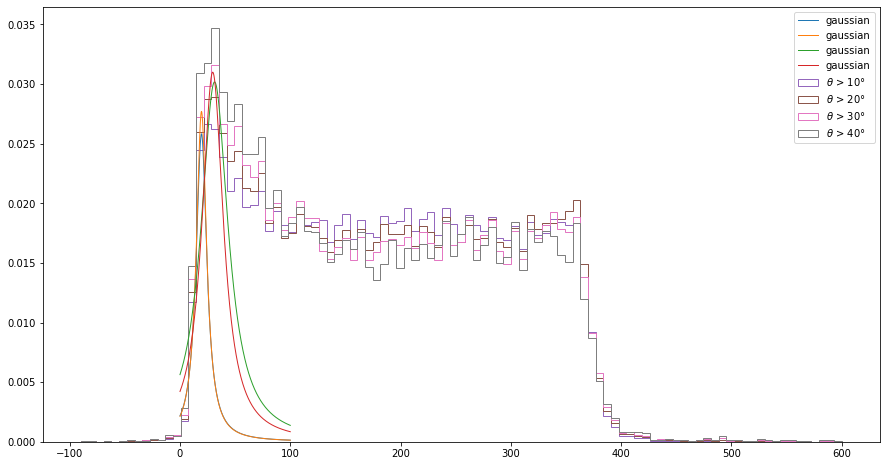

In [25]:
thetas = [10, 20, 30, 40]
# thetas = [5, 10, 20, 30, 40]

# create a list of masks (cuts) that slices data if theta is higher than the selected value
high_cuts = [
    np.abs(df.theta) > theta for theta in thetas
]

gauss_up_peaks = []
lor_up_peaks = []
up_params = []
x=np.linspace(0,100, 60)
fig, ax = plt.subplots(figsize=(15,8))

for cut in high_cuts:
    df_init = data[cut]
    p, b = np.histogram(df_init[  (df_init['drift_time'] > 0) & (df_init['drift_time'] <97)  ].drift_time, bins=x)
    p_norm = normalize(p)
    bin_centers = (b[1:]+b[:-1])/2
    DF = pd.DataFrame({'prob':p_norm, 'bin_cent':bin_centers})
        
    prob_peak = DF['prob'].max()
    bin_peak = DF['bin_cent'][DF[DF['prob'] == prob_peak].index.tolist()].tolist()[0]

    first_half_df = DF.loc[DF['bin_cent'] < bin_peak]
    prob_first_half =  first_half_df['prob']
    bin_cent = pd.Series(bin_centers[ (len(first_half_df)+1) : (2*len(first_half_df) +1) ] , name='bin_cent')

    second_half_df = pd.concat([prob_first_half, bin_cent], axis=1, ignore_index=True)
    second_half_df.columns = ['prob', 'bin_cent']
    second_half_df['prob'] = second_half_df['prob'].values[::-1]

    first_half_df = first_half_df.append({'prob':prob_peak, 'bin_cent':bin_peak}, ignore_index=True)
    final_df = first_half_df.append(second_half_df, ignore_index=True)

    popt_gauss, _ = curve_fit(gaussian, final_df['bin_cent'], final_df['prob'], p0=[1,20,5])
    popt_lor, _ = curve_fit(lorentzian, final_df['bin_cent'], final_df['prob'], p0=[1,20,5])
    
    up_params.append([*popt_gauss])

    y_gauss = gaussian(xx,*popt_gauss)
    gauss_up_peaks.append( y_gauss.max() )

    y_lor = lorentzian(xx,*popt_lor)
    lor_up_peaks.append( y_lor.max() )

    # ax.plot(xx, gaussian(xx,*popt_gauss), linewidth=1, label='gaussian')
    ax.plot(xx, lorentzian(xx,*popt_lor), linewidth=1, label='gaussian')

for h, theta in zip(high_hists, thetas):
    ax.hist(
        bins[:-1],
        bins=bins,
        weights=h,
        histtype="step",
        label=r"$\theta$ > "+str(theta)+"°"
    )
ax.legend()


Correlation coefficient 0.98374
p-value = 1.63e-02
Statistically significant: YES


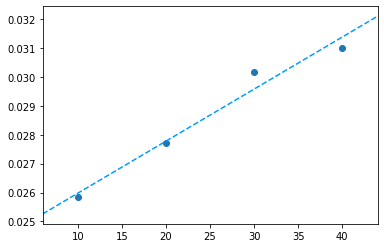

In [26]:
lor_par, _ = curve_fit(
    f=lin,
    xdata=thetas, 
    ydata=lor_up_peaks,
    absolute_sigma=True
)
gauss_par, _ = curve_fit(
    f=lin,
    xdata=thetas, 
    ydata=gauss_up_peaks,
    absolute_sigma=True
)


fig, ax = plt.subplots()

theta_grid = np.linspace(thetas[0]-4, thetas[-1]+4, 500)
ax.set_xlim(theta_grid[0], theta_grid[-1])

ax.scatter(
    thetas, lor_up_peaks
)
ax.plot(
    theta_grid, 
    lin(theta_grid, *lor_par),
    linestyle = "dashed",
    color = "#009cff", 
)
# ax.scatter(
#     thetas, gauss_up_peaks
# )
# ax.plot(
#     theta_grid, 
#     lin(theta_grid, *gauss_par),
#     linestyle = "dashed",
#     color = "#009cff", 
# )


high_r, high_p = scipy.stats.pearsonr(thetas, lor_up_peaks)
# high_r, high_p = scipy.stats.pearsonr(thetas, gauss_up_peaks)

print(f"Correlation coefficient {high_r:.5f}")
print(f"p-value = {high_p:.2e}")
print("Statistically significant:", "YES" if high_p < alpha else "NO")

### taglio con gli intervalli $\theta_i < \theta < \theta_j$

i risultati fanno schifo perché non c'è una buona statistica per ogni intervallo

[0.03997062360401993,
 0.046908980187416634,
 0.0414396464550265,
 0.04192957571486514]

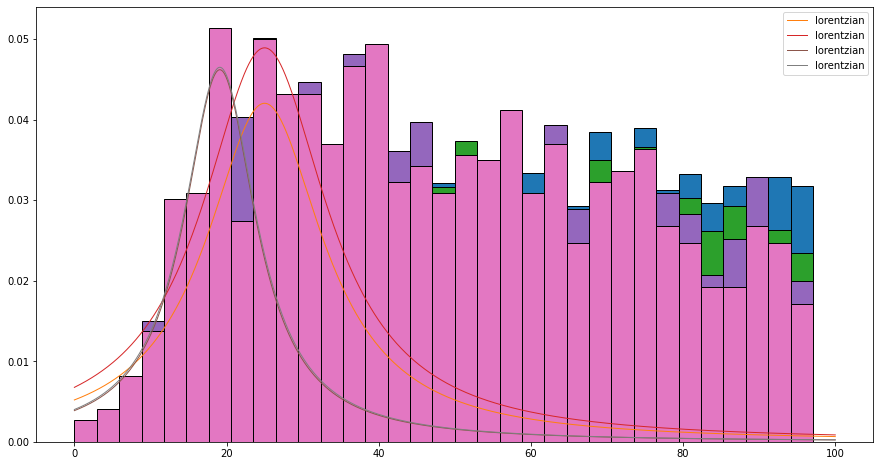

In [74]:
thetas_low = [0,10,20,30]
thetas_up = [10,20,30,40]
# thetas_low = [0,5,10,15,20,25,30,35]
# thetas_up = [5,10,15,20,25,30,35,40]

middle_cut = [ ( (np.abs(data["theta"]) > low ) & (np.abs(data["theta"]) < up ) ) for low,up in zip(thetas_low,thetas_up) ]

gauss_middle_peaks = []
lor_middle_peaks = []

gauss_middle_err = []
lor_middle_err = []

fig, ax = plt.subplots(figsize=(15,8))
x=np.linspace(0,100, 35)

# for cut in middle_cut:
#     df_init = data[cut]
for low,up in zip(thetas_low,thetas_up):
    df_init = data[( (np.abs(data["theta"]) > low ) & (np.abs(data["theta"]) < up ) )]

    p, b = np.histogram(df_init[  (df_init['drift_time'] > 0) & (df_init['drift_time'] <97)  ].drift_time, bins=x)
    p_norm = normalize(p)
    bin_centers = (b[1:]+b[:-1])/2
    DF = pd.DataFrame({'prob':p_norm, 'bin_cent':bin_centers})
        
    prob_peak = DF['prob'].max()
    bin_peak = DF['bin_cent'][DF[DF['prob'] == prob_peak].index.tolist()].tolist()[0]

    first_half_df = DF.loc[DF['bin_cent'] < bin_peak]
    prob_first_half =  first_half_df['prob']
    bin_cent = pd.Series(bin_centers[ (len(first_half_df)+1) : (2*len(first_half_df) +1) ] , name='bin_cent')

    second_half_df = pd.concat([prob_first_half, bin_cent], axis=1, ignore_index=True)
    second_half_df.columns = ['prob', 'bin_cent']
    second_half_df['prob'] = second_half_df['prob'].values[::-1]

    first_half_df = first_half_df.append({'prob':prob_peak, 'bin_cent':bin_peak}, ignore_index=True)
    final_df = first_half_df.append(second_half_df, ignore_index=True)

    popt_gauss, _ = curve_fit(gaussian, final_df['bin_cent'], final_df['prob'], p0=[0.02,20,5])
    popt_lor, _ = curve_fit(lorentzian, final_df['bin_cent'], final_df['prob'], p0=[0.02,20,5])
    
    y_gauss = gaussian(xx,*popt_gauss)
    gauss_middle_peaks.append( y_gauss.max() )
    gauss_middle_err.append(popt_gauss[2])

    y_lor = lorentzian(xx,*popt_lor)
    lor_middle_peaks.append( y_lor.max() )
    lor_middle_err.append(popt_lor[2])
        
    ax.hist(
    b[:-1],
    bins=x,
    weights=p_norm,
    edgecolor='black',
    # density=True
    )    
    ax.plot(xx, lorentzian(xx,*popt_lor), linewidth=1, label='lorentzian')

# for h, theta_low, theta_up in zip(middle_norm_hist, thetas_low,thetas_up,):
#     ax.hist(
#         bins[:-1],
#         bins=bins,
#         weights=h,
#         histtype="step",
#         linewidth = 2,
#         label=str(theta_low)+" "+ r"< $\theta$ < "+str(theta_up)+"°"
#     )
ax.legend()


gauss_middle_peaks

Correlation coefficient 0.48265
p-value = 5.17e-01
Statistically significant: NO


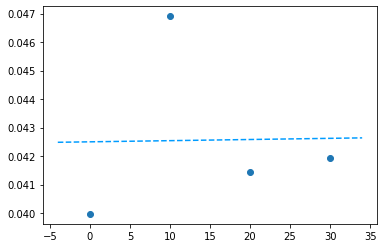

In [68]:
lor_par, _ = curve_fit(
    f=lin,
    xdata=thetas_low, 
    ydata=gauss_middle_peaks,
    absolute_sigma=True
)

fig, ax = plt.subplots()

theta_grid = np.linspace(thetas_low[0]-4, thetas_low[-1]+4, 500)
# ax.set_xlim(theta_grid[0], theta_grid[-1])

ax.scatter(
    thetas_low, gauss_middle_peaks
)
ax.plot(
    theta_grid, 
    lin(theta_grid, *lor_par),
    linestyle = "dashed",
    color = "#009cff", 
)

high_r, high_p = scipy.stats.pearsonr(thetas_low, lor_middle_peaks)
# high_r, high_p = scipy.stats.pearsonr(thetas, gauss_up_peaks)

print(f"Correlation coefficient {high_r:.5f}")
print(f"p-value = {high_p:.2e}")
print("Statistically significant:", "YES" if high_p < alpha else "NO")

0.019490327346577793
0.020264118116172642
0.019490617197942373 23.97705238997835 8.612796330922064


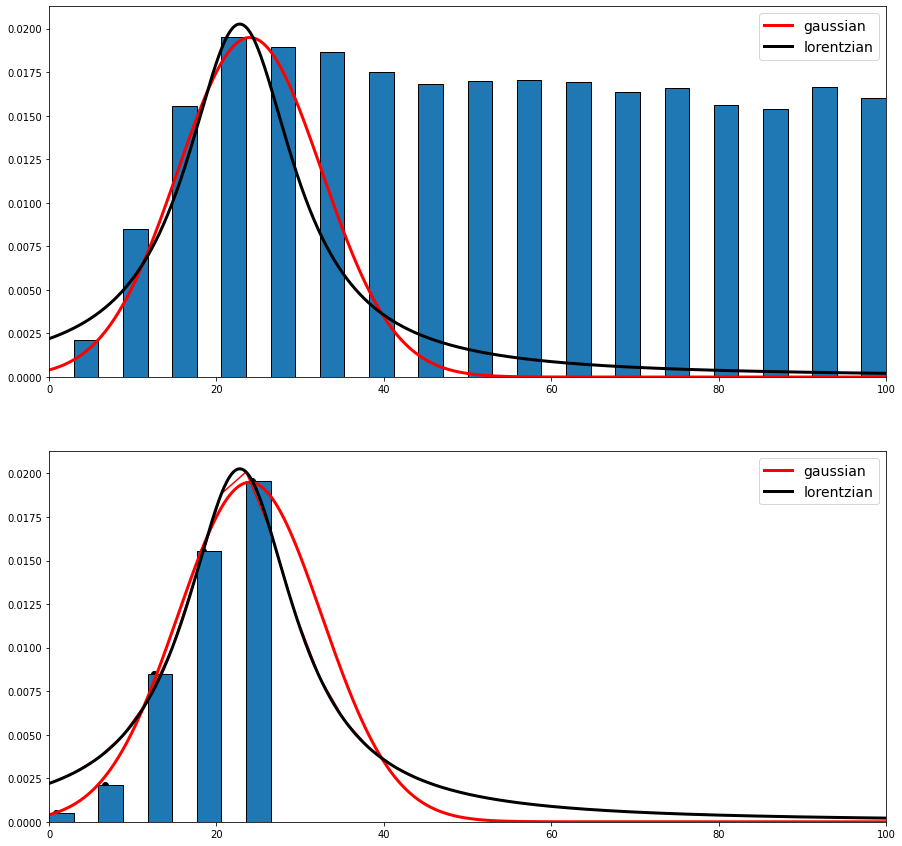

In [123]:
x=np.linspace(0,100, 35)
bins = np.linspace(-90, 490, 100)

df_prova = data[ np.abs(data["theta"]) < 10 ]
# p, b = np.histogram(df_prova[  (df_prova['drift_time'] > 0) & (df_prova['drift_time'] <97)  ].drift_time, bins=x)
p, b = np.histogram(df_prova.drift_time, bins=bins)
p_norm = normalize(p)
bin_centers = (b[1:]+b[:-1])/2

DF = pd.DataFrame({'prob':p_norm, 'bin_cent':bin_centers})
DF = DF[ (DF['bin_cent'] > 0) & (DF['bin_cent'] <97)  ]
DF = DF.reset_index(drop=True)

prob_peak = DF['prob'].max()
bin_peak = DF['bin_cent'][DF[DF['prob'] == prob_peak].index.tolist()].tolist()[0]

first_half_df = DF.loc[DF['bin_cent'] < bin_peak]
prob_first_half =  first_half_df['prob']
bin_cent = pd.Series(bin_centers[ (len(first_half_df)+1) : (2*len(first_half_df) +1) ] , name='bin_cent')

second_half_df = pd.concat([prob_first_half, bin_cent], axis=1, ignore_index=True)
second_half_df.columns = ['prob', 'bin_cent']
second_half_df['prob'] = second_half_df['prob'].values[::-1]

first_half_df = first_half_df.append({'prob':prob_peak, 'bin_cent':bin_peak}, ignore_index=True)
final_df = first_half_df.append(second_half_df, ignore_index=True)

fig, ax = plt.subplots(nrows=2, figsize=(15,15))

ax[0].hist(
    b[:-1],
    bins=x,
    weights=p_norm,
    edgecolor='black',
    # density=True
)
ax[1].hist(
    final_df.bin_cent,
    bins=x[:len(final_df)+1],
    weights=final_df.prob,
    edgecolor='black'
)
ax[0].set_xlim(x[0],x[-1])
ax[1].set_xlim(x[0],x[-1])

ax[1].scatter(
    final_df['bin_cent'],
    final_df['prob'],
    color='black'
)

popt_gauss, _ = curve_fit(gaussian, final_df['bin_cent'], final_df['prob'], p0=[0.5,20,5])
popt_lor, _ = curve_fit(lorentzian, final_df['bin_cent'], final_df['prob'], p0=[0.5,20,5])

xx=np.linspace(x[0], x[-1], 1000)
ax[1].plot(x, lorentzian(x,*popt_lor), color='red')
ax[0].plot(xx, gaussian(xx,*popt_gauss), color='red', linewidth=3, label='gaussian')
ax[1].plot(xx, gaussian(xx,*popt_gauss), color='red', linewidth=3,label='gaussian')

ax[0].plot(xx, lorentzian(xx,*popt_lor), color='black', linewidth=3, label='lorentzian')
ax[1].plot(xx, lorentzian(xx,*popt_lor), color='black', linewidth=3, label='lorentzian')


ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)

yg=gaussian(xx,*popt_gauss)
yl = lorentzian(xx, *popt_lor)
print(yg.max())
print(yl.max())
print(*popt_gauss)



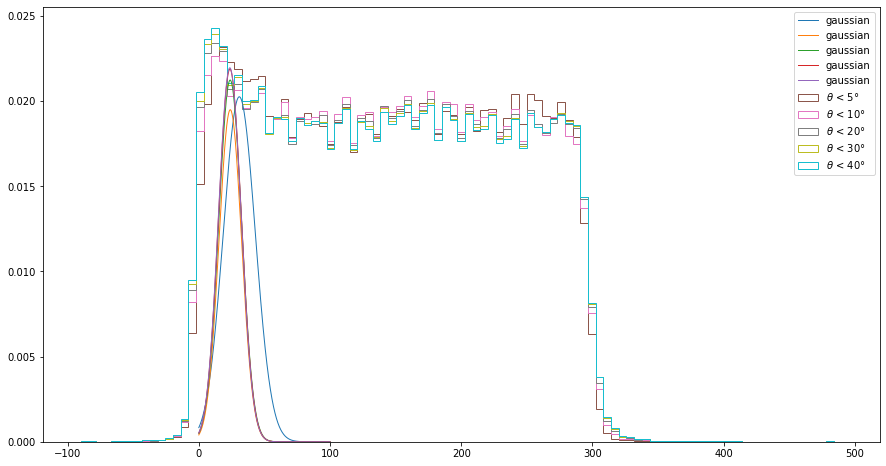

In [127]:
x=np.linspace(0,100, 35)
bins = np.linspace(-90, 490, 100)
xx=np.linspace(x[0], x[-1], 1000)

thetas = [5, 10, 20, 30, 40]
low_cuts = [ np.abs(data.theta) < theta for theta in thetas ]

fig, ax = plt.subplots(figsize=(15,8))

gauss_low_peaks = []
lor_low_peaks = []
low_params=[]
voigt_low_peaks=[]

for cut in low_cuts:
    df_prova = data[ cut ]
    p, b = np.histogram(df_prova.drift_time, bins=bins)
    p_norm = normalize(p)
    bin_centers = (b[1:]+b[:-1])/2

    DF = pd.DataFrame({'prob':p_norm, 'bin_cent':bin_centers})
    DF = DF[ (DF['bin_cent'] > 0) & (DF['bin_cent'] <97)  ]
    DF = DF.reset_index(drop=True)

    prob_peak = DF['prob'].max()
    bin_peak = DF['bin_cent'][DF[DF['prob'] == prob_peak].index.tolist()].tolist()[0]

    first_half_df = DF.loc[DF['bin_cent'] < bin_peak]
    prob_first_half =  first_half_df['prob']
    bin_cent = pd.Series(bin_centers[ (len(first_half_df)+1) : (2*len(first_half_df) +1) ] , name='bin_cent')

    second_half_df = pd.concat([prob_first_half, bin_cent], axis=1, ignore_index=True)
    second_half_df.columns = ['prob', 'bin_cent']
    second_half_df['prob'] = second_half_df['prob'].values[::-1]

    first_half_df = first_half_df.append({'prob':prob_peak, 'bin_cent':bin_peak}, ignore_index=True)
    final_df = first_half_df.append(second_half_df, ignore_index=True)

    popt_gauss, _ = curve_fit(gaussian, final_df['bin_cent'], final_df['prob'], p0=[0.02, 20, 10])
    # popt_lor, _ = curve_fit(lorentzian, final_df['bin_cent'], final_df['prob'], p0=[0.02, 20, 10])

    y_gauss = gaussian(xx,*popt_gauss)
    gauss_low_peaks.append( y_gauss.max() )

    # y_lor = lorentzian(xx,*popt_lor)
    # lor_low_peaks.append( y_lor.max() )

    ax.plot(xx, gaussian(xx,*popt_gauss), linewidth=1, label='gaussian')

for h, theta in zip(low_hists, thetas):
    ax.hist(
        bins[:-1],
        bins=bins,
        weights=h,
        histtype="step",
        label=r"$\theta$ < "+str(theta)+"°"
    )
ax.legend()

